# Feature extraction
> This chapter is a deep-dive on the most frequently used dimensionality reduction algorithm, Principal Component Analysis (PCA). You'll build intuition on how and why this algorithm is so powerful and will apply it both for data exploration and data pre-processing in a modeling pipeline. You'll end with a cool image compression use case.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 4 exercises "Preprocessing for Machine Learning in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

## Feature extraction

### Manual feature extraction I


<p>You want to compare prices for specific products between stores. The features in the pre-loaded dataset <code>sales_df</code> are: <code>storeID</code>, <code>product</code>, <code>quantity</code> and <code>revenue</code>. The <code>quantity</code> and <code>revenue</code> features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.</p>

In [3]:
sales_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/sales_df.csv')

Instructions
<ul>
<li>Calculate the product price from the quantity sold and total revenue.</li>
<li>Drop the quantity and revenue features from the dataset.</li>
</ul>

In [4]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity', 'revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


**When you understand the dataset well, always check if you can calculate relevant features and drop irrelevant ones.**

### Manual feature extraction II


<p>You're working on a variant of the ANSUR dataset, <code>height_df</code>, where a person's height was measured 3 times. Add a feature with the mean height to the dataset, then drop the 3 original features.</p>

In [5]:
height_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/height_df.csv')

Instructions
<ul>
<li>Add a feature with the mean height to the dataset. Use the <code>.mean()</code> method with <code>axis=1</code>.</li>
<li>Drop the 3 original height features from the dataset.</li>
</ul>

In [6]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2','height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2','height_3'], axis=1)

print(reduced_df.head())

   weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


**You've calculated a new feature that is still easy to understand compared to, for instance, principal components.**

### Principal component intuition

<div class=""><p><img src="https://assets.datacamp.com/production/repositories/3515/datasets/e27f8bb70e835e93ebd24a18f65d1399b142184f/lower_vs_upper_arm_vectors_small.png" alt="Forearm vs upper arm lengths"></p>
<p>After standardizing the lower and upper arm lengths from the ANSUR dataset we've added two perpendicular vectors that are aligned with the main directions of variance. We can describe each point in the dataset as a combination of these two vectors multiplied with a value each. These values are then called principal components.</p>
<hr>
<p>Which of the following statements is true?</p></div>

**People with a negative component for the yellow vector have long forearms relative to their upper arms.**

People with a positive component for the yellow vector have long forearms relative to their upper arms.

People with a negative component for the red vector have above average arm lengths.

People with a positive component for the red vector have below average arm lengths.

**You now understand the basic concept of principal components!**

## Principal component analysis

### Calculating Principal Components

<div class=""><p>You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's <code>pairplot()</code>. This will allow you to inspect the pairwise correlations between the features.</p>
<p>The data has been pre-loaded for you as <code>ansur_df</code>.</p></div>

In [7]:
ansur_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/ansur_df_4f.csv')

In [8]:
import seaborn as sns

Instructions 1/4
<li>Create a Seaborn pairplot to inspect <code>ansur_df</code>.</li>

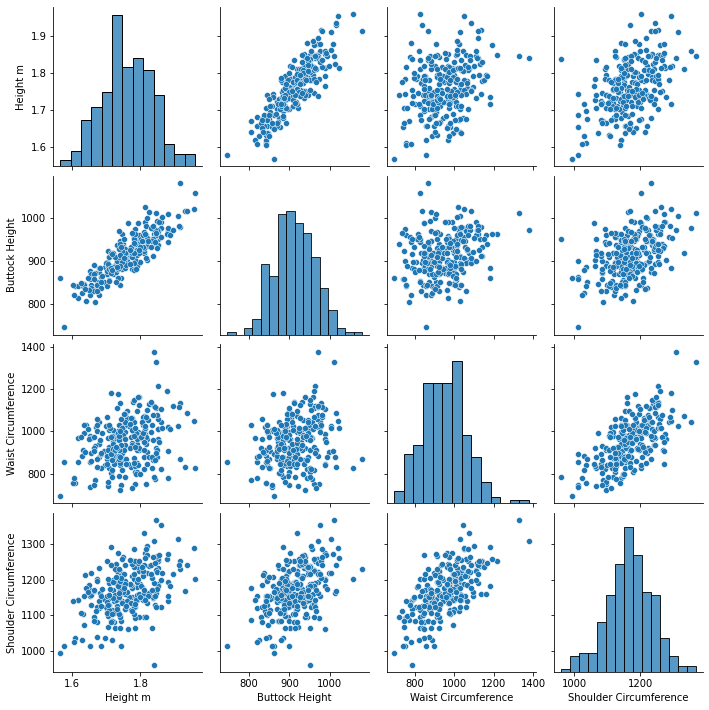

In [9]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

Instructions 2/4
<li>Create the scaler and standardize the data.</li>

In [10]:
from sklearn.preprocessing import StandardScaler

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

Instructions 3/4
<li>Create the <code>PCA()</code> instance and fit and transform the standardized data.</li>

In [11]:
from sklearn.decomposition import PCA

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

Instructions 4/4

<li>Create a pairplot of the principal component dataframe.</li>

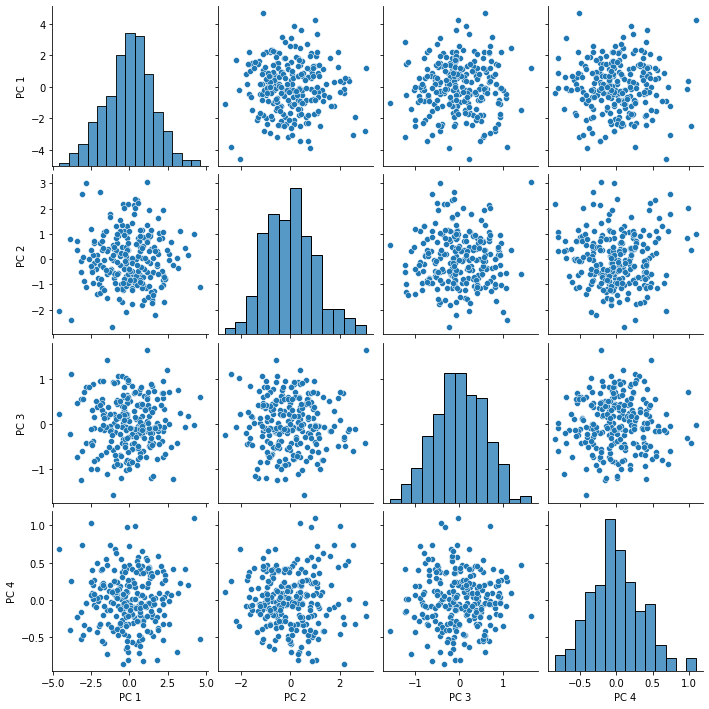

In [12]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

**Notice how, in contrast to the input features, none of the principal components are correlated to one another.**

### PCA on a larger dataset


<p>You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as <code>ansur_df</code>. The fitted model will be used in the next exercise.
Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit <code>pca</code> to the data.</p>

In [14]:
ansur_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/ansur_df_13f.csv')

Instructions
<ul>
<li>Create the <code>scaler</code>.</li>
<li>Standardize the data.</li>
<li>Create the <code>PCA()</code> instance.</li>
<li>Fit it to the standardized data.</li>
</ul>

In [16]:
# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**You've fitted PCA on our 13 feature datasample. Now let's see how the components explain the variance.**

### PCA explained variance


<p>You'll be inspecting the variance explained by the different principal components of the <code>pca</code> instance you created in the previous exercise.</p>

Instructions 1/4
<li>Print the explained variance ratio per principal component.</li>

In [17]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[0.61449404 0.19893965 0.06803095 0.03770499 0.03031502 0.0171759
 0.01072762 0.00656681 0.00634743 0.00436015 0.0026586  0.00202617
 0.00065268]


Instructions 2/4

Question

How much of the variance is explained by the 4th principal component?
Possible Answers

About 3.03%

**About 3.77%**

About 6.8%

About 61.45%

Instructions 3/4
<li>Calculate the cumulative sum of the explained variance ratio using a method of <code>pca.explained_variance_ratio_</code>.</li>

In [18]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.61449404 0.81343368 0.88146463 0.91916962 0.94948464 0.96666054
 0.97738816 0.98395496 0.99030239 0.99466254 0.99732115 0.99934732
 1.        ]


Instructions 4/4

Question

What's the lowest number of principal components you should keep if you don't want to lose more than 10% of explained variance during dimensionality reduction?

Possible Answers

2 principal components

3 principal components

**4 principal components**

5 principal components

**Using just 4 principal components we can explain more than 90% of the variance in the 13 feature dataset.**

## PCA applications

### Understanding the components


<div class=""><p>You'll apply PCA to the numeric features of the Pokemon dataset, <code>poke_df</code>, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.</p>
<p>All relevant packages and classes have been pre-loaded for you (<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>).</p></div>

In [19]:
poke_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/poke_df.csv')

Instructions 1/4
<li>Build the pipeline with the scaler and PCA, set the number of components to calculate to 2.</li>

In [21]:
from sklearn.pipeline import Pipeline

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

Instructions 2/4
<li>Fit the pipeline to the <code>poke_df</code> dataset and extract the component vectors.</li>

In [23]:
# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


Instructions 3/4

Question

Inspect the PC 1 effects. Which statement is true?

Possible Answers

Sp. Atk has the biggest effect on this feature by far. PC 1 can be interpreted as a measure of how good a Pokemon's special attack is.

**All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality (high stats).**

Instructions 4/4

Question

Inspect the PC 2 effects. Which statement is true?

Possible Answers

**Defense has a strong positive effect on the second component and speed a strong negative one. This component quantifies an agility vs. armor & protection trade-off.**

Fast Pokemon have high values for this component.

**You've used the pipeline for the first time and understand how the features relate to the components.**

### PCA for feature exploration


<div class=""><p>You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in <code>poke_df</code>.
These categorical features (<code>Type</code> &amp; <code>Legendary</code>) can be found in a separate dataframe <code>poke_cat_df</code>. </p>
<p>All relevant packages and classes have been pre-loaded for you (<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>)</p></div>

In [26]:
poke_cat_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/poke_cat_df.csv')

Instructions 1/4
<li>Fit and transform the pipeline to <code>poke_df</code> to extract the principal components.</li>

In [24]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


Instructions 2/4
<li>Add the 2 components to <code>poke_cat_df</code>.</li>

In [27]:
# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

print(poke_cat_df.head())

    Type  Legendary      PC 1      PC 2
0  Grass      False -1.556375 -0.021482
1  Grass      False -0.362867 -0.050269
2  Grass      False  1.280152 -0.062720
3  Grass      False  2.620916  0.704263
4   Fire      False -1.758284 -0.706179


Instructions 3/4
<li>Use the Type feature to color the PC 1 vs PC 2 scatterplot.</li>

In [ ]:
# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, x='PC 1', y='PC 2', hue='Type 1');

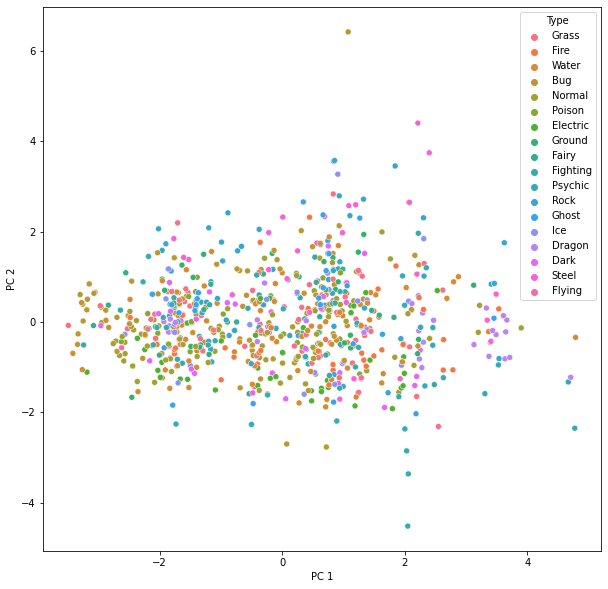

In [50]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df,  x='PC 1', y='PC 2', hue='Type')
plt.show()

Instructions 4/4
<li>Use the Legendary feature to color the PC 1 vs PC 2 scatterplot.</li>

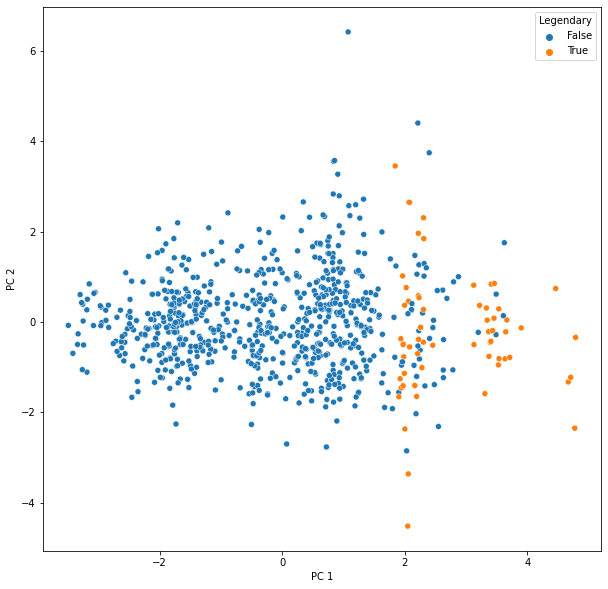

In [51]:
# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, x='PC 1', y='PC 2', hue='Legendary')
plt.show()

**Looks like the different types are scattered all over the place while the legendary Pokemon always score high for PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently fast and vulnerable or slow and armored.**

### PCA in a model pipeline


<div class=""><p>We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.</p>
<p>The data has been pre-loaded for you and split into training and tests datasets: <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>.</p>
<p>Same goes for all relevant packages and classes(<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>, <code>RandomForestClassifier()</code>).</p></div>

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pokemon_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/pokemon_df.csv')
X, y = pokemon_df .iloc[:, :-1], pokemon_df .iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Instructions 1/4
<li>Add a scaler, PCA limited to 2 components, and random forest classifier with <code>random_state=0</code> to the pipeline.</li>

In [54]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

Instructions 2/4
<li>Fit the pipeline to the training data.</li>

In [73]:
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

[0.45624044 0.17767414]


Instructions 3/4
<li>Score the model accuracy on the test set.</li>

In [74]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

95.4% test set accuracy


Instructions 4/4
<li>Repeat the process with 3 extracted components.</li>

In [77]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45624044 0.17767414 0.12858833]
94.6% test set accuracy


**Looks like adding the third component does not increase the model accuracy, even though it adds information to the dataset.**

##  Principal Component selection

## Selecting the proportion of variance to keep

<div class=""><p>You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.</p>
<p>You'll work on the numeric ANSUR female dataset pre-loaded as <code>ansur_df</code>.</p>
<p>All relevant packages and classes have been pre-loaded too (<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>).</p></div>

In [79]:
ansur_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/ansur_df_94f.csv')

Instructions 1/4
<li>Pipe a scaler to PCA selecting 80% of the variance.</li>

In [80]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

Instructions 2/4
<li>Fit the pipe to the data.</li>

In [81]:
# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

11 components selected


Instructions 3/4
<li>Increase the proportion of variance to keep to 90%.</li>

In [82]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

23 components selected


Instructions 4/4

Question

How many additional features do you need to explain 90% instead of 80% of the variance?

Possible Answers

11

**12**

23

**We need to more than double the components to go from 80% to 90% explained variance.**

### Choosing the number of components


<div class=""><p>You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as <code>ansur_df</code>.</p>
<p>All relevant packages and classes have been pre-loaded for you (<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>).</p></div>

Instructions 1/4
<li>Create a pipeline with a scaler and PCA selecting 10 components.</li>

In [83]:
# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

Instructions 2/4
<li>Fit the pipe to the data.</li>

In [84]:
# Fit the pipe to the data
pipe.fit(ansur_df)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reducer',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

Instructions 3/4
<li>Plot the explained variance ratio.</li>

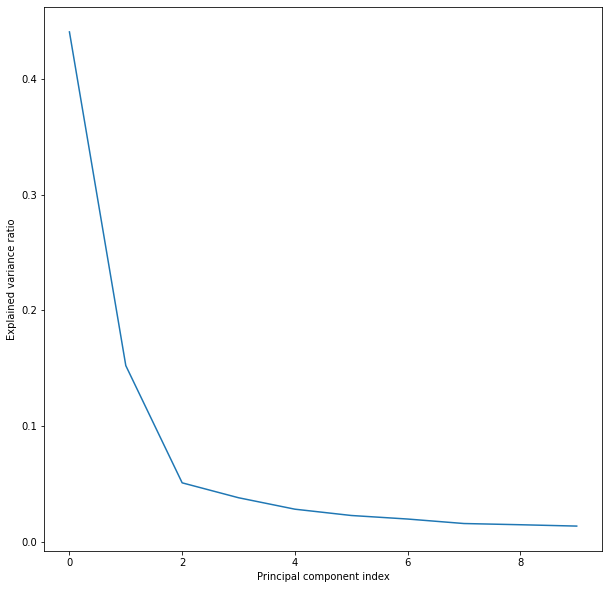

In [85]:
# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)


plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

Instructions 4/4 - Question

To how many components can you reduce the dataset without compromising too much on explained variance? Note that the x-axis is zero indexed.

Possible Answers

1

2

**3**

4

**The 'elbow' in the plot is at 3 components (the 3rd component has index 2).**

### PCA for image compression

<div class=""><p>You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.</p>
<p>The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array <code>X_test</code>. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature. </p>
<p>A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as <code>pipe</code>. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in <code>X_test</code>.</p>
<p>Finally, a function <code>plot_digits</code> has been created for you that will plot 16 images in a grid.</p></div>

In [106]:
! wget https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/X_test_mnist.csv
from numpy import loadtxt
X_test = loadtxt('/content/X_test_mnist.csv', delimiter=',')

--2021-01-24 00:08:35--  https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/X_test_mnist.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 313600 (306K) [text/plain]
Saving to: ‘X_test_mnist.csv.1’

X_test_mnist.csv.1  100%[===================>] 306.25K  --.-KB/s    in 0.03s   

2021-01-24 00:08:35 (9.38 MB/s) - ‘X_test_mnist.csv.1’ saved [313600/313600]



In [100]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary',
                  clim=(0, 300))
    plt.show()

Instructions 1/4
<li>Plot the MNIST sample data.</li>

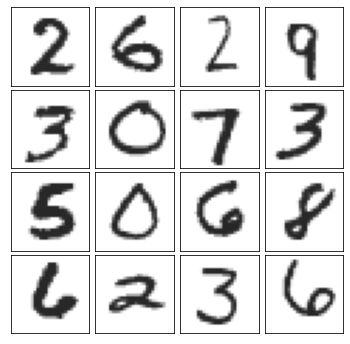

In [107]:
# Plot the MNIST sample data
plot_digits(X_test)

Instructions 2/4
<li>Transform the input data to principal components using the pipeline.</li>

In [108]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

X_test has 784 features
pc has 78 features


Instructions 3/4
<li>Inverse transform the components back to the original feature space.</li>

In [109]:
# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

X_rebuilt has 784 features


Instructions 4/4

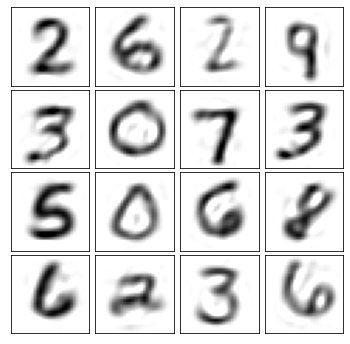

In [111]:
# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)

**You've reduced the size of the data 10 fold but were able to reconstruct images with reasonable quality.**